# Regresión lineal multivariable

Hasta ahora hemos trabajado en casos donde se analiza una sola variable independiente. Ahora, cuando se trabaja con múltiples variables se tiene lo siguiente:

$$ \hat{y}=w_0+w_1*x_1+...+w_n*x_n$$

A continuación, se presenta un ejemplo empleando el mismo dataset del primer notebook.

## Importando datos

In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
            header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


De la matriz de correlación (notebook 01), se puede ver que las dos variables que tienen una mayor correlación con el valor promedio de las casas (MEDV) son el número promedio de habitaciones (RM) y la proporción de acres comerciales no minoristas por ciudad (INDUS).

Del código para crear el modelo, simplemente se agrega la columna INDUS a nuestra variable independiente.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df[['RM', 'INDUS']].values  # Se agregó columna INDUS
y = df['MEDV'].values.reshape(-1, 1)
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

_*En la regresion lineal múltiple hay que considerar que las variables independientes que agregue al modelo no se encuentren altamente correlacionada eso puede implicar en problemas de multicolinealidad_

# Análisis de regresión multivariable

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


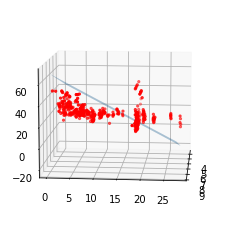

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *
import numpy as np 

x1_range = np.arange(df['RM'].min(),df['RM'].max())
x2_range = np.arange(df['INDUS'].min(),df['INDUS'].max())

## Puntos del plano
X1, X2 = np.meshgrid(x1_range,x2_range)

## Creando el plano
plano = pd.DataFrame({'RM':X1.ravel(), 'INDUS':X2.ravel()})
pred = slr.predict(plano).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1,X2,pred, alpha=0.4)

ax.scatter3D(df['RM'], df['INDUS'], df['MEDV'], color='red', marker='.')
ax.view_init(elev=10, azim=5)
plt.show()

In [ ]:
rooms = 5
indus =3

v1 = sc_x.transform(np.array([rooms,indus]).reshape(1,-1))

precio = sc_y.inverse_transform(slr.predict(v1))
#precio2 = slr.predict(v1)

print(f"El precio promedio de una casa con 5 habitaciones y 3 indus en Boston es de {round(float(precio),2)} miles de USD)")

## Siguiente print solo como referencia
#print(f"El precio promedio ESTANDARIZADO es: {float(precio2)} miles de dolares")

El precio promedio de una casa con 5 habitaciones y 3 indus en Boston es de 15.21 miles de USD)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8b8beb45-6e9e-4db8-96c9-28634efc9b59' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>